In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt

Argmax

In [50]:
#argmax is defined as the index of the maximum value in a given array
def Argmax(x):
    y = max(x)
    return x.index(y)

x = [1, 5, 4, 3]
print(Argmax(x))

1


Mean

In [51]:
#mean is just sum of all elements divided by number of elements
def Mean(x):
    total = 0
    for i in range(len(x)):
        total += x[i]
    mean = total/len(x)
    return mean

print(Mean(x))

3.25


Softmax

In [52]:
x = [1, 2, 3]
# x = [1001. 1002, 1003]

In [53]:
#softmax formula is used to turn raw numbers into probability scores that sum up to one
#using the same array as above
def Softmax(x):
    soft = []
    exp = []
    for i in range(len(x)):
        z = x[i]
        exp.append(np.exp(z)) #using .append adds elements, dont need to know length of array beforehand

    s = np.sum(exp)
    for i in range(len(x)):
        z = exp[i]
        soft.append(z/s)

    print("sum of softmax probabilities:", np.sum(soft)) #to verify that sum is 1
    return soft

print(Softmax(x))

sum of softmax probabilities: 1.0
[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]


softmax with numerical stability

In [54]:
#same thing as above, but subtbract the max from each element for numerical stability
def Softmax_stable(x):
    soft = []
    exp = []
    maax = max(x)
    for i in range(len(x)):
        z = x[i]
        exp.append(np.exp(z - maax)) #subtracting max from each element

    s = np.sum(exp)
    for i in range(len(x)):
        z = exp[i]
        soft.append(z/s)
    return soft

print(Softmax_stable(x))

[0.09003057317038046, 0.24472847105479764, 0.6652409557748218]


log soft max

In [55]:
def log_softmax(x):
    x = np.array(x, dtype=float)
    x = x - np.max(x)  # for numerical stability
    return x - np.log(np.sum(np.exp(x))) #np.log is natural log, and np.exp is exponential function

print(log_softmax(x))

[-2.40760596 -1.40760596 -0.40760596]


# loss functions
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. Binary Cross Entropy
4. Categorical Cross Entropy
5. Hinge Loss
6. KL Divergence

In [56]:
#1. Mean Squared Error (MSE)
# mean squared error is given by the sum of squares of the error between the expected term and the predicted term. divided by number of samples
# L = 1/n * Σ(y_true - y_pred)^2

pred = [1, 3, 4]
ground = [2, 3, 5]

def mse(pred, ground):
    npred = np.array(pred)
    nground = np.array(ground)
    return np.mean((npred - nground)**2) #np.mean computes mean of all elements in the array

print(mse(pred, ground))

#mean absolute error is given by the sum of absolute error between expected and predicted terms, divided by number of samples
# L = 1/n * Σ|y_true - y_pred|
def mae(pred, ground):
    npred = np.array(pred)
    nground = np.array(ground)
    return np.mean(np.abs(npred - nground))

print(mae(pred,ground))

#binary cross entropy is used in binary classification, assigns probability in [0,1] for each element
#L = -(1/n)*Σ(y(log(y_hat) + (1 - y)log(1 - y))
# ran into divide by 0 error here, need to remember to add eps term

bpred = [0.2, 0.7, 0.9, 0.1, 0.2, 0.6]
bground = [0, 1, 0, 0, 1, 1]
def bce(bpred, bground, eps = 10**-12):
    npred = np.array(bpred)
    nground = np.array(bground)
    npred = np.clip(npred, eps, 1 - eps)  # np.clip limits the values in npred to be within [eps, 1-eps]
    return -np.mean(nground * np.log(npred) + (1 - nground) * np.log(1 - npred))

print(bce(bpred, bground))

#categorical cross entropy is used in multi class classification problems
#L = -np.mean(np.sum(y_ground*np.log(y_pred)))

def cce(y_pred, y_ground):
    np_pred = np.array(y_pred)
    np_ground = np.array(y_ground)
    eps = 10**-15
    np_pred = np.clip(np_pred, eps, 1 - eps)

    return -np.mean(np.sum(np_ground * np.log(np_pred), axis=1))

y_pred = [
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1],
    [0.2, 0.2, 0.6],
]
y_ground = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
]

print(cce(y_pred, y_ground))

#hinge loss is used in support vector machines for binary classification
# L = np.mean(max(0, 1 - y_pred*y_ground)), y_pred in {1, -1}
y_true = [1, -1, 1]
y_pred = [2.0, -3.0, 1.5]

def hinge_loss(y_true, y_pred):
    np_true = np.array(y_true)
    np_pred = np.array(y_pred)
    return np.mean(np.maximum(0, 1 - np_true*np_pred))

print(hinge_loss(y_true, y_pred))

#KL divergene is used to measure how one prob dist is different from a different target prob dist
#D_KL(P||Q) = Sum_i(P_i * log (P_i/Q_i))
# discrete case: arrays of values summing to one
# continuous case: integral over probability density functions, but only works if the families are known
# how inefficient would it be to encode samples from p using a code optimized for q?
def kl_div(p, q, eps=1e-15):
    np_p = np.array(p)
    np_q = np.array(q)
    np_p = np.clip(np_p, eps, 1)   # avoid log(0)
    np_q = np.clip(np_q, eps, 1)
    np_p = np_p / np_p.sum() # dont use assert, because floating point may not always add to 1 (use .isclose if you really need to)
    np_q = np_q / np_q.sum()
    return np.sum(np_p * np.log(np_p/np_q))

p = [0.4, 0.6]
q = [0.5, 0.5]

print(kl_div(p, q))


0.6666666666666666
0.6666666666666666
0.8513379400174842
0.3635480396729776
0.0
0.020135513550688863


[25.     22.5625 20.25   18.0625 16.     14.0625 12.25   10.5625  9.
  7.5625  6.25    5.0625  4.      3.0625  2.25    1.5625  1.      0.5625
  0.25    0.0625  0.      0.0625  0.25    0.5625  1.      1.5625  2.25
  3.0625  4.      5.0625  6.25    7.5625  9.     10.5625 12.25   14.0625
 16.     18.0625 20.25   22.5625]


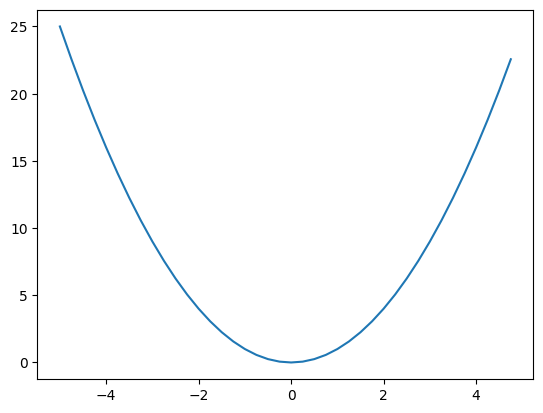

In [57]:
xs = np.arange(-5, 5, 0.25) # creates an array from -5 to 5, with step size 0.25

def f(x):
    return x**2
ys = f(xs)
print(f(xs)) # you can call the function on an entire array and it will return an array of the same shape with the function applied element-wise

plt.plot(xs, ys)

manual linear regression

- we are modelling a linear relationship between x and y as
$$ y = wx + b$$
- And we are defining w and b using MSE (as defined above) and we want to iteratively move towards a lower mse using gradient descent, given by

$$ w = w - \eta * \frac{\partial L}{\partial w}, b = b - \eta * \frac{\partial L}{\partial b} $$
where $\eta$ is the learning rate


until convergence/in range len(epochs)
- L = MSE error tween y and mx + b
- calculate $a = \frac{\partial L}{\partial w} \text{and} c = \frac{\partial L}{\partial b}$
- w = w - $\eta$ a
- b = b - $\eta$ c
- Implementation below

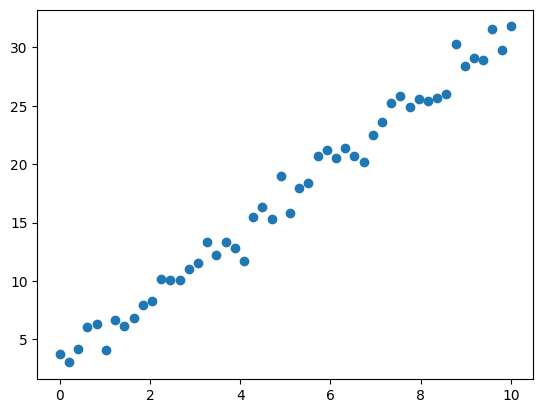

In [58]:
np.random.seed(0)
x = np.linspace(0, 10, 50) # 50 points between 0 and 10
y = 3*x  + 2 + np.random.randn(*x.shape) # y = 3x + 2 + noise

plt.scatter(x,y)

now we write the actual functions
- initialise w, b to be random numbers
- define learning rate, epoch length

In [59]:
w, b = np.random.randn(), np.random.randn()  # random initialisation of weight and bias
lr = 0.01  # learning rate
epochs = 2000  # number of iterations

training code

In [60]:
tol = 1e-6
prev_loss = float('inf')

for epoch in range(epochs):
    pred = w * x + b
    dw = (-2/len(x)) * np.sum((y - pred) * x)  # derivative of MSE w.r.t w
    db = (-2/len(x)) * np.sum(y - pred)  # derivative
    w = w - lr * dw
    b = b - lr * db


    loss = np.mean((y - pred)**2)
    print(f"Epoch {epoch:03d} | Loss: {loss:.4f}")


    if prev_loss - loss < tol:
        print(f'achieved convergence at epoch:', epoch)
        break

    prev_loss = loss


print(f"Final w: {w:.3f}, b: {b:.3f}")

Epoch 000 | Loss: 574.0997
Epoch 001 | Loss: 57.5116
Epoch 002 | Loss: 7.3554
Epoch 003 | Loss: 2.4785
Epoch 004 | Loss: 1.9973
Epoch 005 | Loss: 1.9428
Epoch 006 | Loss: 1.9299
Epoch 007 | Loss: 1.9211
Epoch 008 | Loss: 1.9127
Epoch 009 | Loss: 1.9045
Epoch 010 | Loss: 1.8963
Epoch 011 | Loss: 1.8883
Epoch 012 | Loss: 1.8803
Epoch 013 | Loss: 1.8724
Epoch 014 | Loss: 1.8645
Epoch 015 | Loss: 1.8568
Epoch 016 | Loss: 1.8491
Epoch 017 | Loss: 1.8415
Epoch 018 | Loss: 1.8340
Epoch 019 | Loss: 1.8266
Epoch 020 | Loss: 1.8192
Epoch 021 | Loss: 1.8119
Epoch 022 | Loss: 1.8047
Epoch 023 | Loss: 1.7976
Epoch 024 | Loss: 1.7905
Epoch 025 | Loss: 1.7835
Epoch 026 | Loss: 1.7766
Epoch 027 | Loss: 1.7697
Epoch 028 | Loss: 1.7629
Epoch 029 | Loss: 1.7562
Epoch 030 | Loss: 1.7495
Epoch 031 | Loss: 1.7429
Epoch 032 | Loss: 1.7364
Epoch 033 | Loss: 1.7299
Epoch 034 | Loss: 1.7235
Epoch 035 | Loss: 1.7172
Epoch 036 | Loss: 1.7110
Epoch 037 | Loss: 1.7047
Epoch 038 | Loss: 1.6986
Epoch 039 | Loss: 1.69

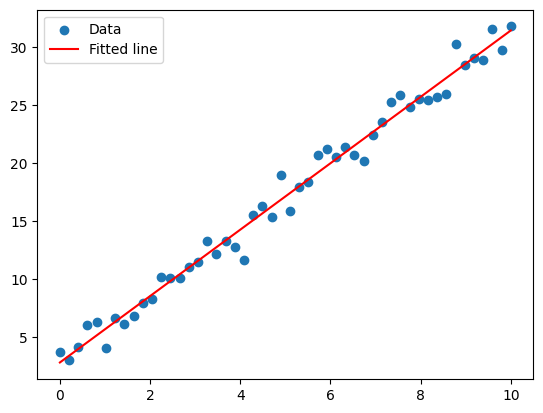

In [61]:
plt.scatter(x, y, label='Data')
plt.plot(x, w*x + b, color='r', label='Fitted line')
plt.legend()
plt.show()

## Analytic Answer
$$ w = \frac{Cov(x,y)}{Var(x)}, b = y - wx $$

Covariance is defined as joint variability between x and y
Variance is just normal variation of x

In [62]:
w_a = np.cov(x, y)[0, 1] / np.var(x) #[0,1] represents covariance between x and y
b_a = np.mean(y) - w_a * np.mean(x)

print(f"Analytic w: {w_a:.3f}, b: {b_a:.3f}")

Analytic w: 2.917, b: 2.555


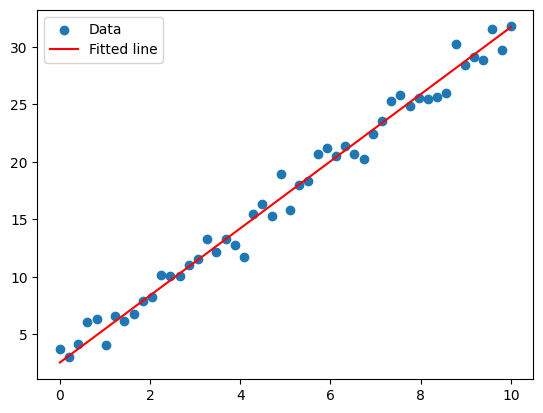

In [63]:
plt.scatter(x, y, label='Data')
plt.plot(x, w_a*x + b_a, color='r', label='Fitted line')
plt.legend()
plt.show()